In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [32]:
# Create "Text" column by combining "Title" and "Review Text"
df["Text"] = df["Title"].fillna('') + " " + df["Review Text"]

df["Text"] = df["Text"].str.strip()
df.drop(columns=['Unnamed: 0',"Positive Feedback Count"], axis=1, inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [33]:

print(df.isnull().sum().sort_values(ascending=False))
print("==========Duplicates==========")

print(df.duplicated().sum())

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)
# pirnt(df.isnull().sum().sort_values(ascending=False))
# print(df.duplicated().sum())

Title              3810
Review Text         845
Text                845
Division Name        14
Department Name      14
Class Name           14
Clothing ID           0
Age                   0
Rating                0
Recommended IND       0
dtype: int64
==========Duplicates==========
21


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      19662 non-null  int64 
 1   Age              19662 non-null  int64 
 2   Title            19662 non-null  object
 3   Review Text      19662 non-null  object
 4   Rating           19662 non-null  int64 
 5   Recommended IND  19662 non-null  int64 
 6   Division Name    19662 non-null  object
 7   Department Name  19662 non-null  object
 8   Class Name       19662 non-null  object
 9   Text             19662 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.7+ MB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing ID,19662.0,921.297274,200.227528,1.0,861.0,936.0,1078.0,1205.0
Age,19662.0,43.260808,12.258122,18.0,34.0,41.0,52.0,99.0
Rating,19662.0,4.183145,1.112224,1.0,4.0,5.0,5.0,5.0
Recommended IND,19662.0,0.818177,0.385708,0.0,1.0,1.0,1.0,1.0


Minimum age: 18
Maximum age: 99
Average age: 43.26080764927271
Median age: 41.0


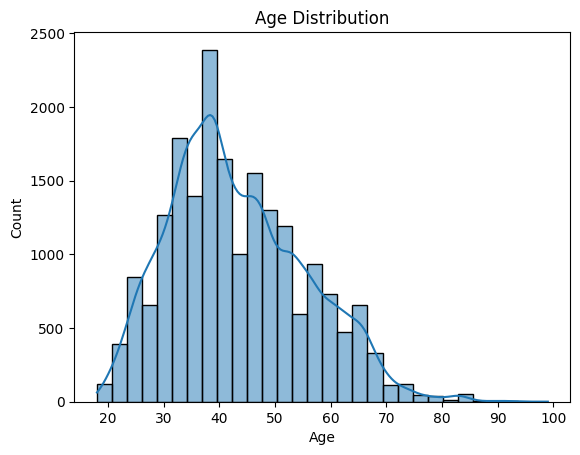

In [36]:
print("Minimum age:", df["Age"].min())
print("Maximum age:", df["Age"].max())
print("Average age:", df["Age"].mean())
print("Median age:", df["Age"].median())
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

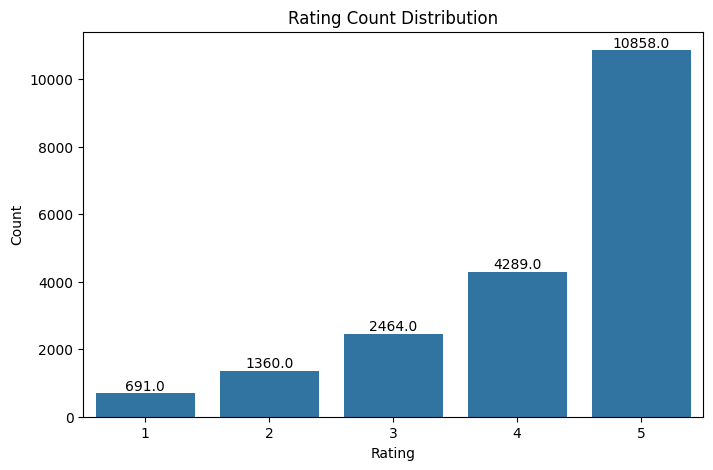

In [37]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Rating'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Rating Count Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


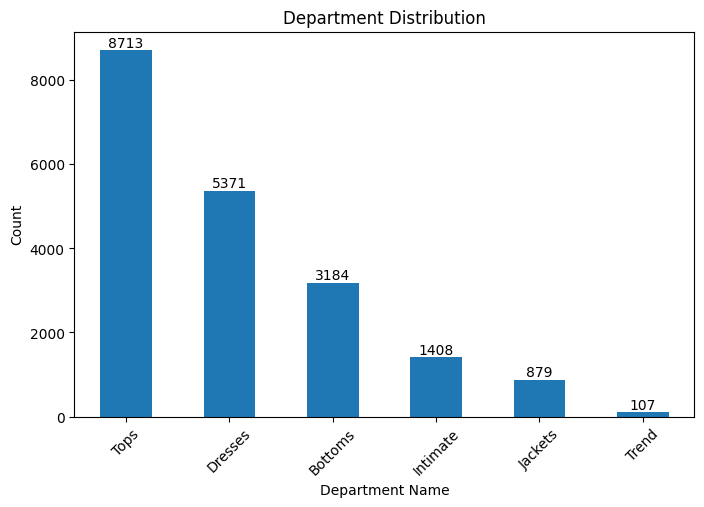

In [38]:
plt.figure(figsize=(8, 5))
ax = df['Department Name'].value_counts().plot(kind='bar')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Department Distribution")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

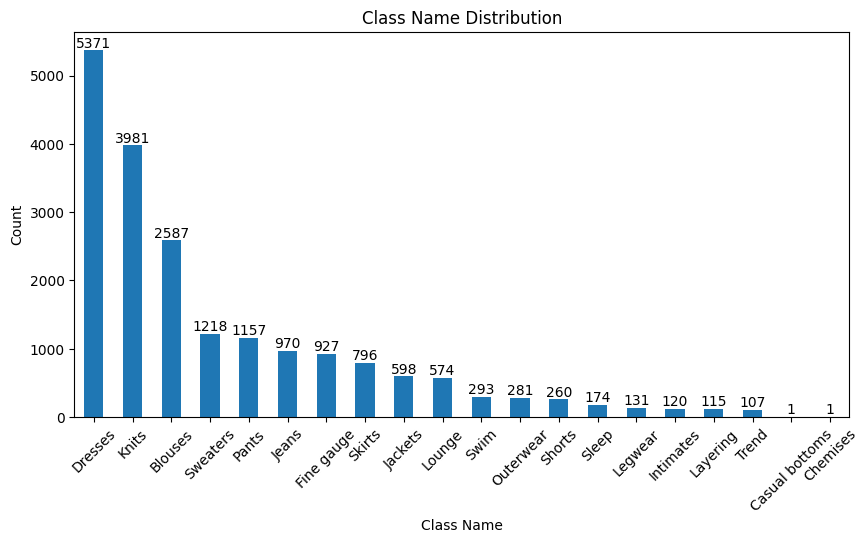

In [39]:
plt.figure(figsize=(10, 5))
ax = df['Class Name'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Class Name Distribution")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

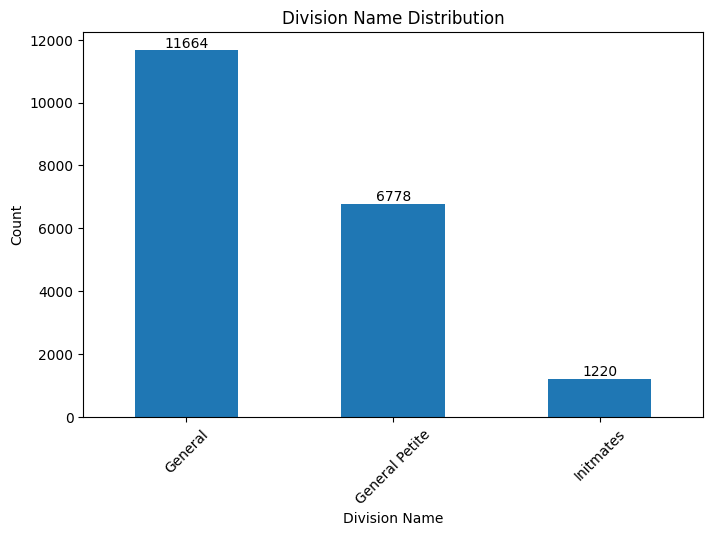

In [40]:
plt.figure(figsize=(8, 5)) 
ax = df['Division Name'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Division Name Distribution")
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

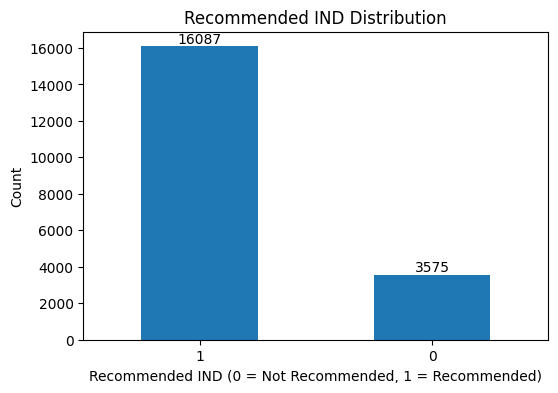

In [41]:
plt.figure(figsize=(6, 4)) 
ax = df['Recommended IND'].value_counts().plot(kind='bar')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Recommended IND Distribution")
plt.xlabel("Recommended IND (0 = Not Recommended, 1 = Recommended)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

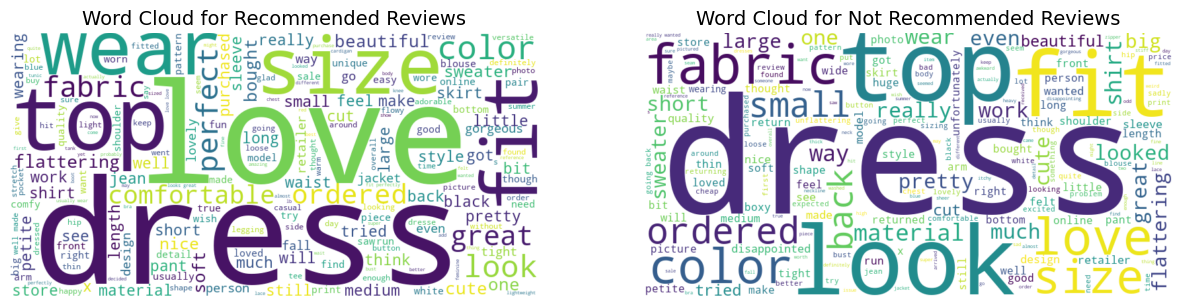

In [42]:
recommended_text = " ".join(df[df["Recommended IND"] == 1]["Text"].astype(str))
not_recommended_text = " ".join(df[df["Recommended IND"] == 0]["Text"].astype(str))

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

wordcloud_recommended = WordCloud(width=800, height=400, background_color="white").generate(recommended_text)
axes[0].imshow(wordcloud_recommended, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Word Cloud for Recommended Reviews", fontsize=14)

wordcloud_not_recommended = WordCloud(width=800, height=400, background_color="white").generate(not_recommended_text)
axes[1].imshow(wordcloud_not_recommended, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Word Cloud for Not Recommended Reviews", fontsize=14)

plt.show()

C:\Users\mynam\AppData\Local\Temp\ipykernel_15768\1669409092.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_ratings = df.groupby('Age Group')['Rating'].mean().reset_index()
C:\Users\mynam\AppData\Local\Temp\ipykernel_15768\1669409092.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Rating', data=age_group_ratings, palette='coolwarm')


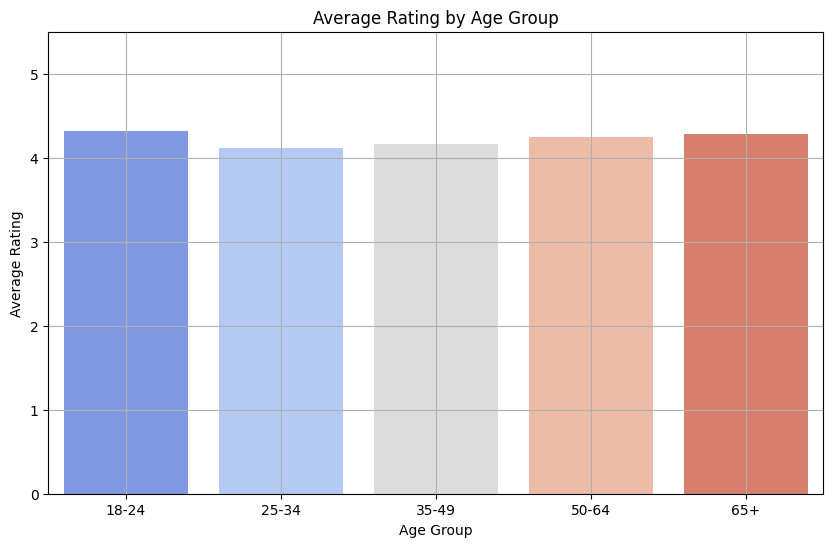

In [43]:
bins = [18, 25, 35, 50, 65, 100]
labels = ['18-24', '25-34', '35-49', '50-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_ratings = df.groupby('Age Group')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Rating', data=age_group_ratings, palette='coolwarm')

plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.ylim(0, 5.5)
plt.grid(True)
plt.show()

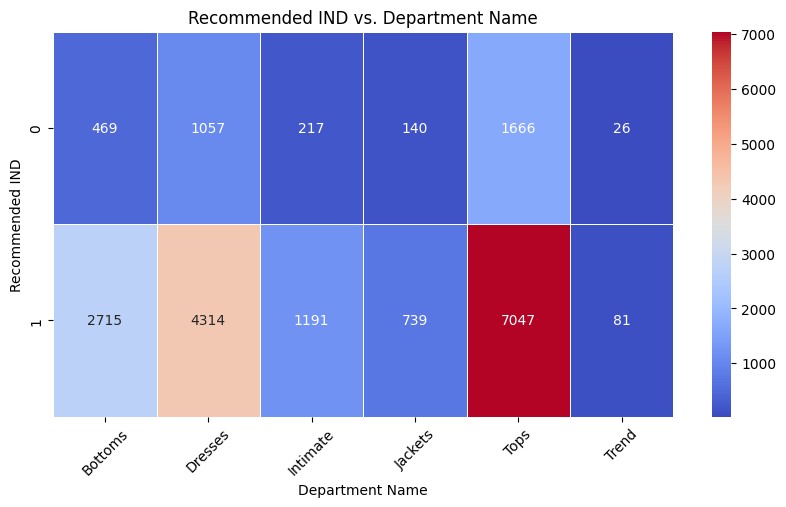

In [44]:
crosstab = pd.crosstab(df['Recommended IND'], df['Department Name'])

plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="coolwarm", linewidths=0.5)

plt.title("Recommended IND vs. Department Name")
plt.xlabel("Department Name")
plt.ylabel("Recommended IND")
plt.xticks(rotation=45)
plt.show()

In [27]:
import plotly.express as px
px.box(df, x="Age", y="Division Name", orientation="h",color = 'Recommended IND')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Recommended IND=0<br>Age=%{x}<br>Division Name=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa'},
              'name': '0',
              'notched': False,
              'offsetgroup': '0',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('PDE1Hx8hJB8kJTgkHCYsIRcsICUyJz' ... 'cpOj4bOSI4LyYtL0Q6KjU7HCciIB8='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['General', 'General', 'General', ..., 'General', 'General Petite',
                          'General Petite'], dtype=object),
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Recommended IND=1<br>Age=%{x}<br>Division Name=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#EF553B'},
              'name': '1',
              'notched': False,
              'offsetgroup': '1',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('Mi8nJxgiNSwyLyIpIC8hNyI3HzUcLh' ... 'EYQSopIjwjMh8gHSApGycqIjAcNA=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': array(['General Petite', 'General', 'General Petite', ..., 'General Petite',
                          'General', 'General Petite'], dtype=object),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'title': {'text': 'Recommended IND'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Age'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Division Name'}}}
})

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import spacy
from tqdm.notebook import tqdm
import joblib

In [ ]:
nlp = spacy.load('en_core_web_sm')

def process_text(text):
    if pd.isna(text):
        return ""
    doc = nlp(text)
    
    tokens = [token.lemma_.lower() for token in doc 
              if not token.is_stop and not token.is_punct and not token.is_space]
    
    return " ".join(tokens)


In [47]:
sample_review = df['Review Text'].iloc[0]
print("Original review:\n", sample_review)
print("\nProcessed review:\n", process_text(sample_review))


Original review:
 I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c

Processed review:
 high hope dress want work initially order petite small usual size find outrageously small small fact zip reorder petite medium ok overall half comfortable fit nicely half tight layer somewhat cheap net layer imo major design flaw net layer sew directly zipper c


In [48]:
print("Processing reviews with spaCy...")
tqdm.pandas()
df['processed_text'] = df['Review Text'].progress_apply(process_text)
print(df)
print("Processing complete!")

Processing reviews with spaCy...


  0%|          | 0/19662 [00:00<?, ?it/s]

       Clothing ID  Age                                              Title  \
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
5             1080   49                            Not for the very petite   
6              858   39                               Cagrcoal shimmer fun   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Ratin

In [28]:
df['processed_text'].head()

2    high hope dress want work initially order peti...
3    love love love jumpsuit fun flirty fabulous ti...
4    shirt flattering adjustable tie perfect length...
5    love tracy reese dress petite 5 foot tall usua...
6    ade basket hte mintue look like person store p...
Name: processed_text, dtype: object

In [64]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [26]:
print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Number of features: {len(tfidf_vectorizer.get_feature_names_out())}")

TF-IDF matrix shape: (19662, 3584)
Number of features: 3584


In [49]:
# Prepare features and targets
X = X_tfidf
y_rating = df['Rating']
y_recommended = df['Recommended IND']

In [50]:
# Split data into training and testing sets
X_train, X_test, y_rating_train, y_rating_test, y_rec_train, y_rec_test = train_test_split(
    X, y_rating, y_recommended, test_size=0.2, random_state=42
)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (15729, 3584)
Testing set shape: (3933, 3584)


In [51]:
# Define models for Rating prediction
rating_models = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


Training Logistic Regression for Rating prediction...


c:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mynam\AppData\Local\Programs\Python\P


Logistic Regression Results:
Accuracy: 0.6283
Precision: 0.5888
Recall: 0.6283
F1 Score: 0.5930
CV Accuracy: 0.6219 (±0.0042)

Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.11      0.18       140
           2       0.36      0.14      0.20       297
           3       0.34      0.38      0.36       419
           4       0.40      0.28      0.33       837
           5       0.74      0.90      0.81      2240

    accuracy                           0.63      3933
   macro avg       0.47      0.36      0.38      3933
weighted avg       0.59      0.63      0.59      3933



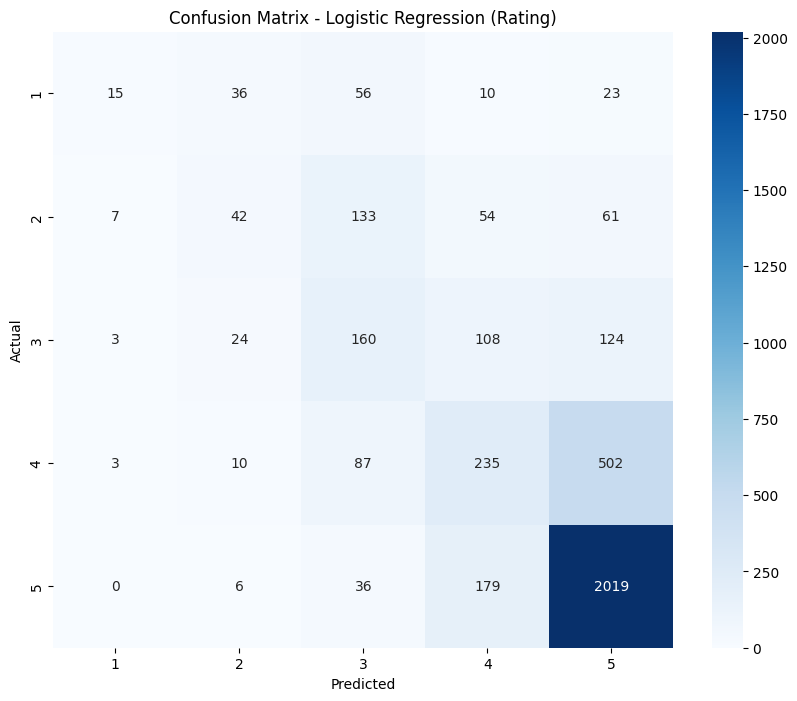


Training Random Forest for Rating prediction...

Random Forest Results:
Accuracy: 0.5960
Precision: 0.4970
Recall: 0.5960
F1 Score: 0.4879
CV Accuracy: 0.5841 (±0.0033)

Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.01      0.01       140
           2       0.32      0.02      0.04       297
           3       0.34      0.20      0.25       419
           4       0.32      0.06      0.10       837
           5       0.63      0.98      0.77      2240

    accuracy                           0.60      3933
   macro avg       0.39      0.25      0.23      3933
weighted avg       0.50      0.60      0.49      3933



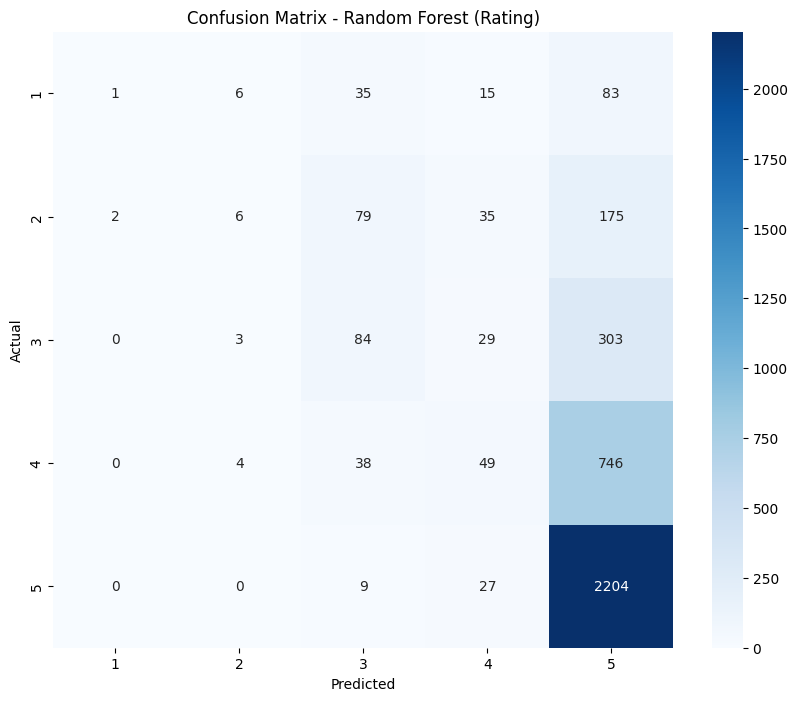

In [52]:
# Train and evaluate each Rating model
rating_results = {}

for name, model in rating_models.items():
    print(f"\nTraining {name} for Rating prediction...")

    joblib.dump(model, f'{name}_rating_model.pkl')
    # Train the model
    model.fit(X_train, y_rating_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_rating_test, y_pred)
    precision = precision_score(y_rating_test, y_pred, average='weighted')
    recall = recall_score(y_rating_test, y_pred, average='weighted')
    f1 = f1_score(y_rating_test, y_pred, average='weighted')
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y_rating, cv=5, scoring='accuracy')
    
    # Store results
    rating_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'model': model,
        'predictions': y_pred
    }
    
    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_rating_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_rating_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(y_rating.unique()), 
                yticklabels=sorted(y_rating.unique()))
    plt.title(f'Confusion Matrix - {name} (Rating)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [53]:
# Define models for Recommendation prediction
rec_models = {
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}



Training Logistic Regression for Recommendation prediction...

Logistic Regression Results:
Accuracy: 0.8889
Precision: 0.9043
Recall: 0.9672
F1 Score: 0.9347
CV Accuracy: 0.8806 (±0.0044)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       700
           1       0.90      0.97      0.93      3233

    accuracy                           0.89      3933
   macro avg       0.84      0.75      0.78      3933
weighted avg       0.88      0.89      0.88      3933



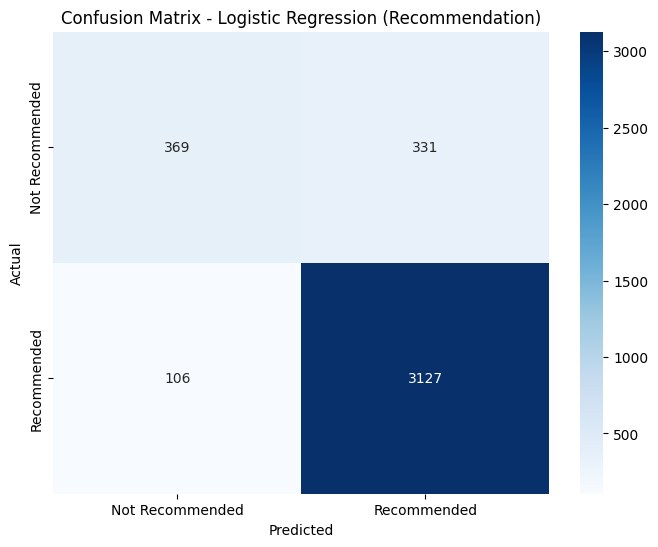


Training Random Forest for Recommendation prediction...

Random Forest Results:
Accuracy: 0.8609
Precision: 0.8626
Recall: 0.9882
F1 Score: 0.9211
CV Accuracy: 0.8576 (±0.0019)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.27      0.41       700
           1       0.86      0.99      0.92      3233

    accuracy                           0.86      3933
   macro avg       0.85      0.63      0.67      3933
weighted avg       0.86      0.86      0.83      3933



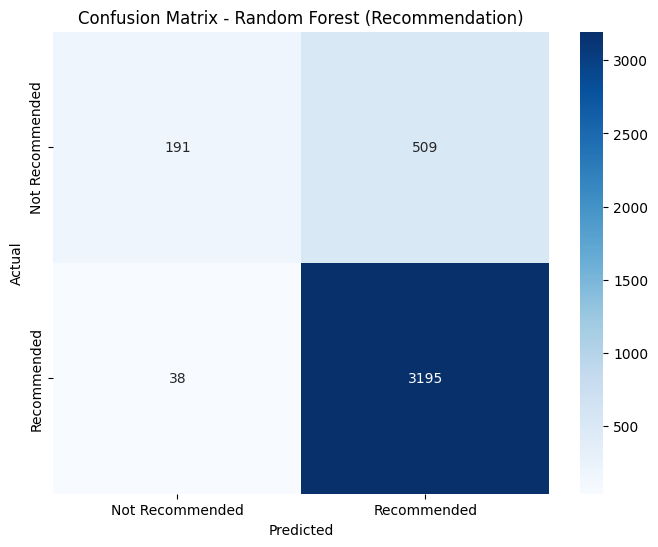

In [54]:
# Train and evaluate each Recommendation model
rec_results = {}

for name, model in rec_models.items():
    print(f"\nTraining {name} for Recommendation prediction...")
    


    # Train the model
    model.fit(X_train, y_rec_train)
    
    joblib.dump(model, f'{name}_rec_model.pkl')

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_rec_test, y_pred)
    precision = precision_score(y_rec_test, y_pred)
    recall = recall_score(y_rec_test, y_pred)
    f1 = f1_score(y_rec_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y_recommended, cv=5, scoring='accuracy')
    
    # Store results
    rec_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'model': model,
        'predictions': y_pred
    }
    
    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_rec_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_rec_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Recommended', 'Recommended'], 
                yticklabels=['Not Recommended', 'Recommended'])
    plt.title(f'Confusion Matrix - {name} (Recommendation)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [55]:
# Compare Rating models
rating_comparison = pd.DataFrame({
    'Model': list(rating_results.keys()),
    'Accuracy': [results['accuracy'] for results in rating_results.values()],
    'Precision': [results['precision'] for results in rating_results.values()],
    'Recall': [results['recall'] for results in rating_results.values()],
    'F1 Score': [results['f1'] for results in rating_results.values()],
    'CV Accuracy': [results['cv_mean'] for results in rating_results.values()]
})

print("Rating Model Comparison:")
rating_comparison.set_index('Model')

Rating Model Comparison:


,Accuracy,Precision,Recall,F1 Score,CV Accuracy
Model,,,,,
Logistic Regression,0.628274,0.588768,0.628274,0.593023,0.621910
Random Forest,0.595983,0.497039,0.595983,0.487882,0.584121


In [56]:
# Compare Recommendation models
rec_comparison = pd.DataFrame({
    'Model': list(rec_results.keys()),
    'Accuracy': [results['accuracy'] for results in rec_results.values()],
    'Precision': [results['precision'] for results in rec_results.values()],
    'Recall': [results['recall'] for results in rec_results.values()],
    'F1 Score': [results['f1'] for results in rec_results.values()],
    'CV Accuracy': [results['cv_mean'] for results in rec_results.values()]
})

print("Recommendation Model Comparison:")
rec_comparison.set_index('Model')

Recommendation Model Comparison:


,Accuracy,Precision,Recall,F1 Score,CV Accuracy
Model,,,,,
Logistic Regression,0.888889,0.904280,0.967213,0.934688,0.880582
Random Forest,0.860920,0.862581,0.988246,0.921147,0.857593


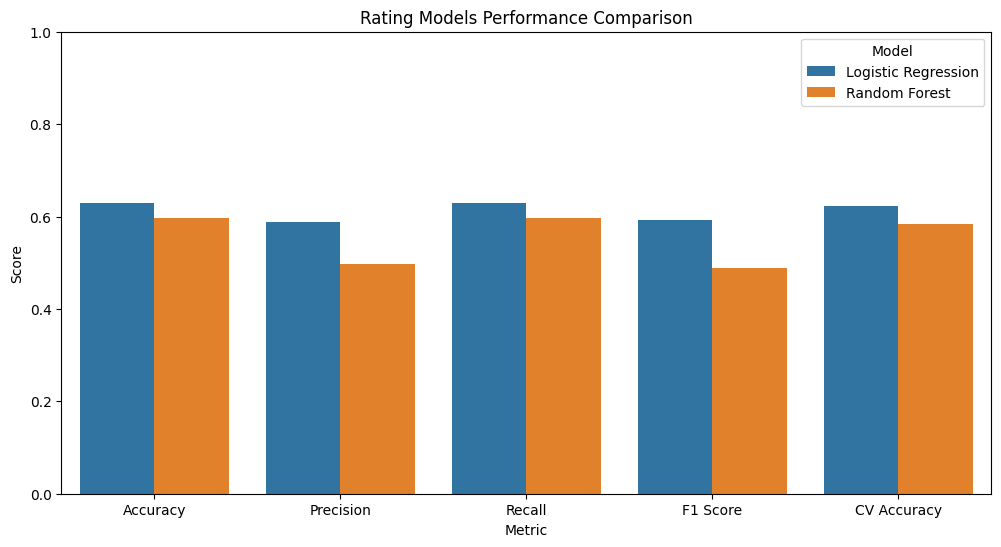

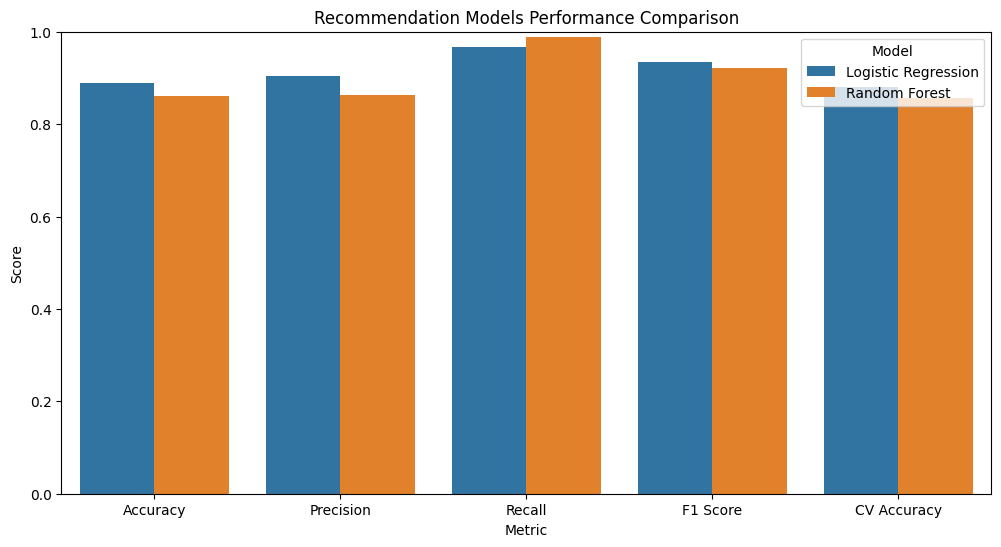

In [57]:
# Visualize performance comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
# Rating models comparison
plt.figure(figsize=(12, 6))
rating_comparison_melted = pd.melt(rating_comparison, id_vars=['Model'], value_vars=metrics, 
                                 var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=rating_comparison_melted)
plt.title('Rating Models Performance Comparison')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

# Recommendation models comparison
plt.figure(figsize=(12, 6))
rec_comparison_melted = pd.melt(rec_comparison, id_vars=['Model'], value_vars=metrics, 
                              var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=rec_comparison_melted)
plt.title('Recommendation Models Performance Comparison')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

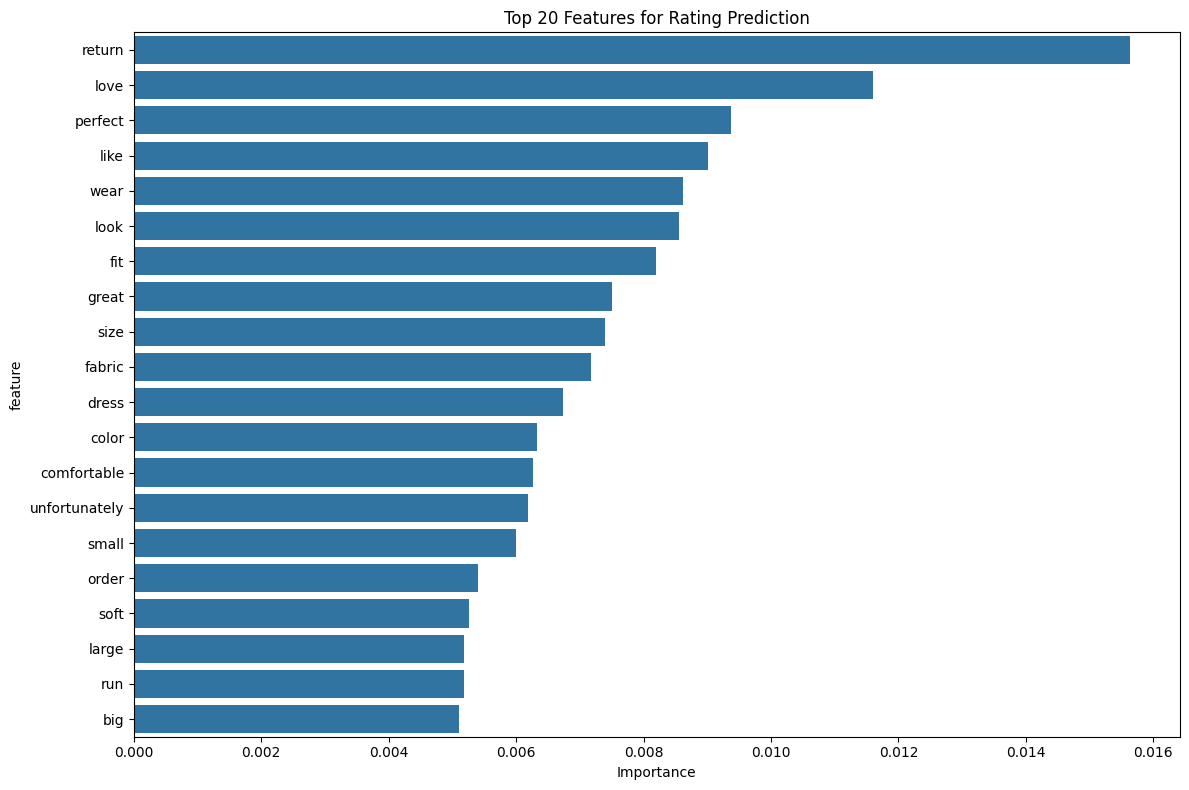

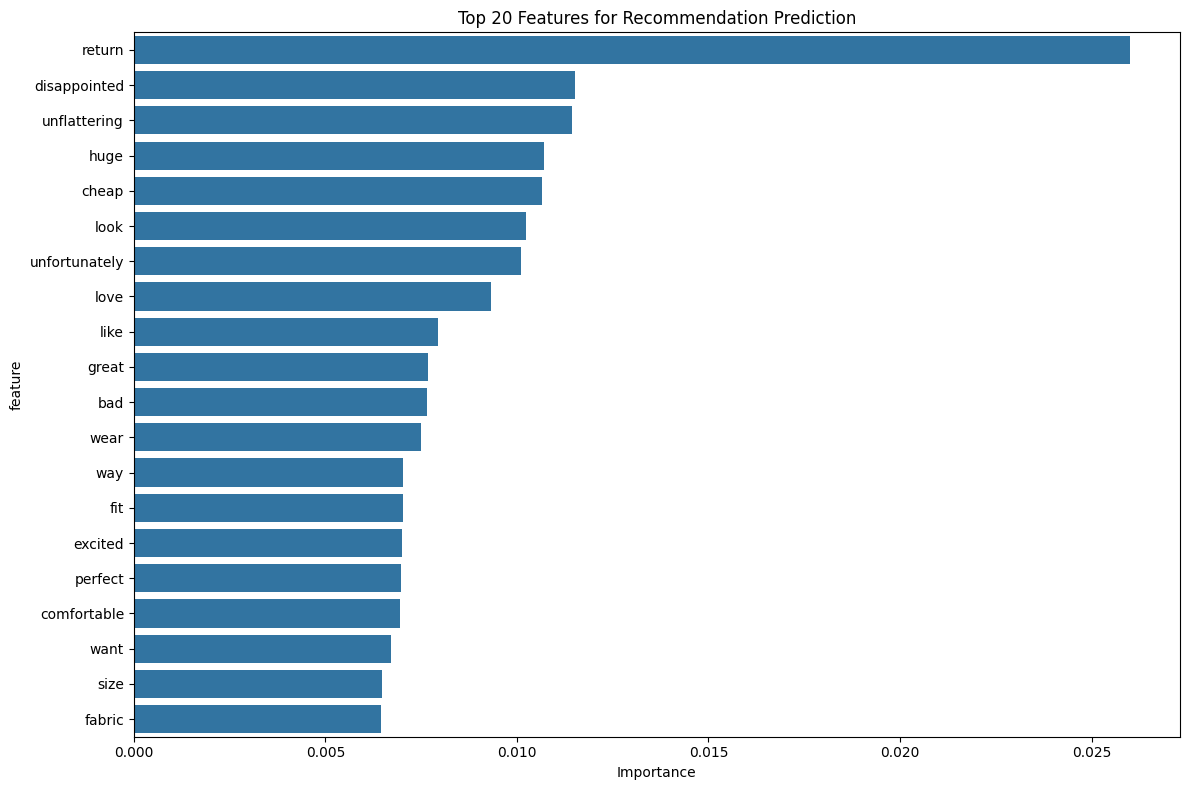

In [58]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# For the Random Forest models, we can extract feature importance
rating_rf = rating_results['Random Forest']['model']
rec_rf = rec_results['Random Forest']['model']

# Rating feature importance
rating_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rating_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Recommendation feature importance
rec_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rec_rf.feature_importances_
}).sort_values('importance', ascending=False)

# Display top features for Rating prediction
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rating_importance.head(20))
plt.title('Top 20 Features for Rating Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Display top features for Recommendation prediction
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rec_importance.head(20))
plt.title('Top 20 Features for Recommendation Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [65]:
# Select the best models based on performance
best_rating_model = max(rating_results.items(), key=lambda x: x[1]['f1'])[1]['model']
best_rec_model = max(rec_results.items(), key=lambda x: x[1]['f1'])[1]['model']

In [66]:
# Function to make predictions for new reviews
def predict_review(review_text):
    # Process the text
    processed = process_text(review_text)
    
    # Transform using the same vectorizer
    features = tfidf_vectorizer.transform([processed])
    
    # Make predictions
    rating = best_rating_model.predict(features)[0]
    recommended = best_rec_model.predict(features)[0]
    
    return {
        'Rating': rating,
        'Recommended': 'Yes' if recommended == 1 else 'No'
    }

In [67]:
# Test with some sample reviews
test_reviews = [
    "I absolutely love this dress! The fit is perfect and the material is high quality. Definitely worth the price.",
    "The shirt was okay, but the material was a bit thin. It fits as expected though.",
    "Terrible product. Fell apart after one wash. Complete waste of money. Do not buy!"
]

for i, review in enumerate(test_reviews):
    result = predict_review(review)
    print(f"Review {i+1}: {review[:50]}...")
    print(f"Predicted Rating: {result['Rating']}")
    print(f"Predicted Recommendation: {result['Recommended']}\n")

Review 1: I absolutely love this dress! The fit is perfect a...
Predicted Rating: 5
Predicted Recommendation: Yes

Review 2: The shirt was okay, but the material was a bit thi...
Predicted Rating: 3
Predicted Recommendation: No

Review 3: Terrible product. Fell apart after one wash. Compl...
Predicted Rating: 1
Predicted Recommendation: No



In [68]:
# Summary of model performance
print("RATING PREDICTION:")
print(rating_comparison.set_index('Model'))
print("\nRECOMMENDATION PREDICTION:")
print(rec_comparison.set_index('Model'))

RATING PREDICTION:
                     Accuracy  Precision    Recall  F1 Score  CV Accuracy
Model                                                                    
Logistic Regression  0.628274   0.588768  0.628274  0.593023     0.621910
Random Forest        0.595983   0.497039  0.595983  0.487882     0.584121

RECOMMENDATION PREDICTION:
                     Accuracy  Precision    Recall  F1 Score  CV Accuracy
Model                                                                    
Logistic Regression  0.888889   0.904280  0.967213  0.934688     0.880582
Random Forest        0.860920   0.862581  0.988246  0.921147     0.857593


In [63]:
# Best model for each task
best_rating_model_name = max(rating_results.items(), key=lambda x: x[1]['f1'])[0]
best_rec_model_name = max(rec_results.items(), key=lambda x: x[1]['f1'])[0]

print(f"\nBest model for Rating prediction: {best_rating_model_name}")
print(f"Best model for Recommendation prediction: {best_rec_model_name}")

print("\nTop 10 most important words for Rating prediction:")
print(rating_importance.head(10))

print("\nTop 10 most important words for Recommendation prediction:")
print(rec_importance.head(10))


Best model for Rating prediction: Logistic Regression
Best model for Recommendation prediction: Logistic Regression

Top 10 most important words for Rating prediction:
      feature  importance
2575   return    0.015637
1889     love    0.011599
2257  perfect    0.009378
1838     like    0.009010
3460     wear    0.008612
1870     look    0.008558
1285      fit    0.008193
1481    great    0.007504
2822     size    0.007395
1216   fabric    0.007182

Top 10 most important words for Recommendation prediction:
            feature  importance
2575         return    0.026007
1014   disappointed    0.011529
3339   unflattering    0.011440
1607           huge    0.010714
647           cheap    0.010645
1870           look    0.010249
3342  unfortunately    0.010108
1889           love    0.009312
1838           like    0.007944
1481          great    0.007673
